In [ ]:
import torch
# Set the device to CPU
device = torch.device("cpu")
act=[torch.Tensor([ 0.0056,  0.0088,  0.0041, -0.0196,  0.0318,  0.0571, -0.0213], device=device), 
       torch.Tensor([ 0.0072,  0.0174,  0.0155, -0.0142,  0.0314,  0.0644, -0.0250], device=device), 
       torch.Tensor([ 0.0105,  0.0098,  0.0013, -0.0352,  0.0362,  0.0726, -0.0136], device=device), 
       torch.Tensor([-0.0859,  0.9599, -0.1526,  0.7142, -0.7654, -0.4575, -0.1924],device=device),
       torch.Tensor([ 0.9379,  0.8099, -0.4069,  0.9840, -0.5012, -0.7882,  0.9019],device=device), 
       torch.Tensor([ 0.0222, -0.0113,  0.0070, -0.0278,  0.0469,  0.0983, -0.0294],device=device), 
       torch.Tensor([-0.6993,  0.1166, -0.1432,  0.8463, -0.7898,  0.9651,  0.7509],device=device), 
       torch.Tensor([ 0.8086, -0.1013, -0.6988,  0.1877,  0.0752, -0.6032,  0.2061],device=device), 
       torch.Tensor([-0.4980, -0.8692, -0.1736,  0.1549, -0.0070, -0.6744, -0.2569],device=device),
       torch.Tensor([-0.7246,  0.2981,  0.7121, -0.8136,  0.5074,  0.3804,  0.7333],device=device), 
       torch.Tensor([-0.0044,  0.0087,  0.0068,  0.0011,  0.0439,  0.0870, -0.0187],device=device), 
       torch.Tensor([ 0.8305, -0.6940,  0.9806, -0.8814, -0.8822,  0.6465,  0.5532],device=device), 
       torch.Tensor([ 0.0135, -0.0154,  0.0162, -0.0319,  0.0514,  0.0762, -0.0252],device=device), 
       torch.Tensor([ 0.0095,  0.0081,  0.0254, -0.0023,  0.0521,  0.0687, -0.0063], device=device), 
       torch.Tensor([ 0.0149, -0.0034, -0.0068, -0.0371,  0.0315,  0.0860, -0.0123], device=device), 
       torch.Tensor([ 0.0245, -0.0133,  0.0085, -0.0075,  0.0582,  0.0831, -0.0191],device=device), 
       torch.Tensor([ 0.1396, -0.0016,  0.2254,  0.4455,  0.3278,  0.5242, -0.7074],device=device), 
       torch.Tensor([-0.1422, -0.1287, -0.7492, -0.6580,  0.8380, -0.0847, -0.0551],device=device), 
       torch.Tensor([-0.0010,  0.0225,  0.0193, -0.0460,  0.0465,  0.0715, -0.0418],device=device), 
       torch.Tensor([ 0.0283, -0.0028,  0.0214, -0.0092,  0.0324,  0.0658, -0.0111],device=device) ]

Robosuite UR5e Robot State Attributes
====================================

In the Robosuite framework, the state of the UR5e robot is encapsulated in the observation (`obs`) dictionary returned by the environment's `step()` function. The specific state attributes and their names within the `obs` dictionary can vary depending on the configuration and implementation of the environment. However, a common set of state attributes for the UR5e robot includes:

- "joint_pos": Joint positions of the robot's arm.
- "joint_vel": Joint velocities of the robot's arm.
- "eef_pos": Position of the end-effector.
- "eef_quat": Orientation of the end-effector represented as a quaternion.
- "gripper_pos": Position of the gripper (if applicable).
- "gripper_vel": Velocity of the gripper (if applicable).
- "gripper_state": Binary value indicating the gripper state (e.g., open or closed).

Please refer to the documentation or source code of the specific UR5e environment you are using in Robosuite for a complete list of available state attributes and their meanings.



In [9]:
import os

os.environ["CUDA_VISIBLE_DEVICES"] = "1"  # Use the first GPU
import numpy as np
import robosuite

# Create the environment
env = robosuite.make("PickPlace", "UR5e", has_renderer=False)

# Set the number of rollouts
num_rollouts = 1

# Lists to store states and controls
states = []
controls = []

# Run rollouts
for _ in range(num_rollouts):
    # Reset the environment
    obs = env.reset()

    # Rollout loop
    done = False
    while not done:
        # Random control input
        control = np.random.randn(env.action_dim)

        # Store state and control
        states.append(obs['robot0_eef_pos'])
        controls.append(control)

        # Step the environment
        obs, reward, done, info = env.step(control)

# Convert lists to numpy arrays
states = np.array(states)
controls = np.array(controls)

# Print the captured dynamics
print("Captured states:", states)
print("Captured controls:", controls)



Captured states: [[-0.16479809 -0.13225347  0.97460856]
 [-0.16479809 -0.13225347  0.97460856]
 [-0.15717756 -0.13586473  0.98189094]
 ...
 [ 0.32776818  0.24148471  0.97454385]
 [ 0.33609995  0.21687133  0.97483751]
 [ 0.32303788  0.26415162  0.97462731]]
Captured controls: [[ 1.36709706  1.32870019 -0.49791151 ...  0.27190113  0.22988281
   0.53297632]
 [ 0.03155204 -0.7255907   0.34131059 ... -0.05957094 -0.68591186
   1.22958879]
 [ 0.15294368 -0.42210985 -0.83306534 ... -0.37091887 -0.85934997
   0.06894154]
 ...
 [ 0.47600395 -0.6981422   1.95890627 ... -0.09885135 -0.06210704
   0.27254653]
 [ 0.90842088  1.17480899 -0.64076254 ... -0.56063012 -0.1659606
   0.61017589]
 [-1.54537936 -0.96666064  0.03020713 ...  0.65953242 -1.11911501
  -3.09535065]]


In [19]:
print (states.shape)
print (obs.keys())
print (obs ['robot0_proprio-state'].shape)
print (obs)

(1000, 3)
odict_keys(['robot0_joint_pos_cos', 'robot0_joint_pos_sin', 'robot0_joint_vel', 'robot0_eef_pos', 'robot0_eef_quat', 'robot0_gripper_qpos', 'robot0_gripper_qvel', 'agentview_image', 'Milk_pos', 'Milk_quat', 'Milk_to_robot0_eef_pos', 'Milk_to_robot0_eef_quat', 'Bread_pos', 'Bread_quat', 'Bread_to_robot0_eef_pos', 'Bread_to_robot0_eef_quat', 'Cereal_pos', 'Cereal_quat', 'Cereal_to_robot0_eef_pos', 'Cereal_to_robot0_eef_quat', 'Can_pos', 'Can_quat', 'Can_to_robot0_eef_pos', 'Can_to_robot0_eef_quat', 'robot0_proprio-state', 'object-state'])
(37,)
OrderedDict([('robot0_joint_pos_cos', array([0.99832672, 0.99999906, 0.99998476, 0.99944759, 0.99964876,
       0.99967751])), ('robot0_joint_pos_sin', array([-0.05782528, -0.00137048,  0.00552089,  0.03323434, -0.02650189,
        0.02539426])), ('robot0_joint_vel', array([-1.37432795, -0.01961923,  0.1156941 ,  0.81141532, -0.64383799,
        0.5900272 ])), ('robot0_eef_pos', array([0.32303788, 0.26415162, 0.97462731])), ('robot0_eef_

In [4]:
# Extract the robot state
robot_state = env.sim.get_state()
# Access specific robot state attributes
joint_positions = robot_state.qpos
joint_velocities = robot_state.qvel

In [5]:
print (joint_positions.shape)
print (joint_velocities.shape)
print (control.shape)

(40,)
(36,)
(7,)


In [7]:
print (obs['robot0_eef_pos'])

[0.317 0.289 0.975]


In [15]:
print (robot_state)

MjSimState(time=0.06, qpos=array([-7.48626463e-02, -1.12411130e-03,  6.47969122e-03,  3.85721356e-02,
       -5.15237916e-03,  4.92334497e-02,  4.13349778e+00, -1.83688148e+00,
        2.63324981e+00,  4.05926728e+00, -2.34069070e+00, -3.95028168e-01,
        5.73068102e-03, -5.89364253e-03,  1.53888072e-01,  9.99953061e-01,
       -9.00689012e-03, -3.56012960e-03,  2.79349793e-04,  1.52473172e-03,
       -1.76579575e-03,  7.41606592e-03,  9.99334984e-01,  2.63632804e-02,
        2.51905975e-02,  3.03115014e-06,  2.40298587e-03, -2.97430368e-03,
        6.53204199e-02,  9.98958492e-01,  3.49256430e-02,  2.93596476e-02,
        3.75442312e-04,  3.91143265e-03, -2.92874908e-02,  6.02020858e-02,
        9.98035141e-01,  5.99979249e-02,  1.80224240e-02,  1.13997125e-03]), qvel=array([-6.18349065e-01,  5.00467105e-02,  1.38945674e-02,  2.44156636e-01,
        1.07365778e+00,  1.16277322e+00, -3.93145421e+01,  5.32107648e+01,
       -9.48919569e+01, -2.92832285e+01,  2.02514267e+01, -2.30854

In [3]:
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import ParameterEstimator, MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination
import pandas as pd

# Create a sample dataset (replace this with your own data)
data = pd.DataFrame(data={
    'A': [0, 1, 0, 1, 0],
    'B': [0, 0, 1, 1, 0],
    'C': [0, 1, 0, 0, 1],
    'D': [0, 1, 1, 1, 0]
})

# Initialize an empty Bayesian Network
model = BayesianNetwork()

# Define the nodes of the Bayesian Network
model.add_nodes_from(['A', 'B', 'C', 'D'])

# Learn the structure of the Bayesian Network from data
# Using the Maximum Likelihood Estimator (MLE)
model.fit(data, estimator=MaximumLikelihoodEstimator)

# Print the learned CPDs (Conditional Probability Distributions)
for node in model.nodes():
    cpd = model.get_cpds(node)
    print(f"CPD for {node}:\n{cpd}")

# Perform inference using Variable Elimination
inference = VariableElimination(model)
query_result = inference.query(variables=['D'], evidence={'A': 1})
print("Inference Results:")
print(query_result)


CPD for A:
+------+-----+
| A(0) | 0.6 |
+------+-----+
| A(1) | 0.4 |
+------+-----+
CPD for B:
+------+-----+
| B(0) | 0.6 |
+------+-----+
| B(1) | 0.4 |
+------+-----+
CPD for C:
+------+-----+
| C(0) | 0.6 |
+------+-----+
| C(1) | 0.4 |
+------+-----+
CPD for D:
+------+-----+
| D(0) | 0.4 |
+------+-----+
| D(1) | 0.6 |
+------+-----+
Inference Results:
+------+----------+
| D    |   phi(D) |
+======+==========+
| D(0) |   0.4000 |
+------+----------+
| D(1) |   0.6000 |
+------+----------+


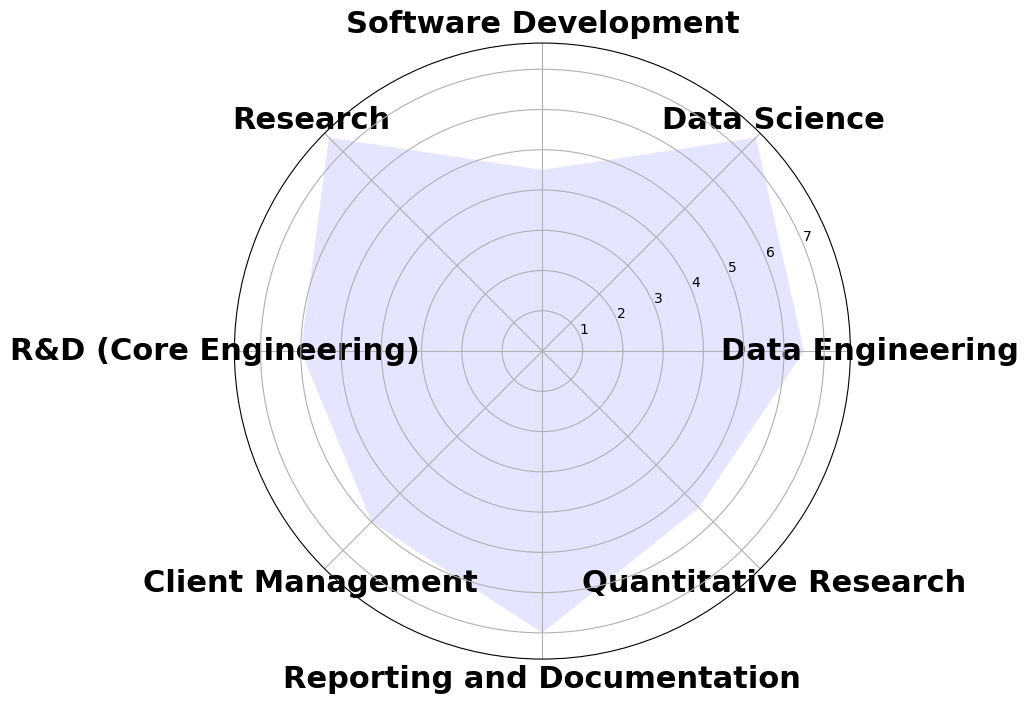

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Generate random samples from the Pareto distribution
pareto_samples = np.random.pareto(a=2, size=1000)

# Generate random samples from the Exponential distribution
exponential_samples = np.random.exponential(scale=1, size=1000)

# Generate random samples from the Normal distribution
normal_samples = np.random.normal(loc=0, scale=1, size=1000)

# Sort the samples for plotting
pareto_samples.sort()
exponential_samples.sort()
normal_samples.sort()

# Create theoretical quantiles for each distribution
pareto_theoretical_quantiles = stats.pareto.ppf(np.linspace(0.01, 0.99, 1000), b=2)
exponential_theoretical_quantiles = stats.expon.ppf(np.linspace(0.01, 0.99, 1000))
normal_theoretical_quantiles = stats.norm.ppf(np.linspace(0.01, 0.99, 1000))

# Create QQ plots
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.scatter(normal_theoretical_quantiles, normal_samples, alpha=0.5)
plt.title("QQ Plot: Normal vs. Normal")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")

plt.subplot(1, 3, 2)
plt.scatter(exponential_theoretical_quantiles, exponential_samples, alpha=0.5)
plt.title("QQ Plot: Exponential vs. Exponential")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")

plt.subplot(1, 3, 3)
plt.scatter(pareto_theoretical_quantiles, pareto_samples, alpha=0.5)
plt.title("QQ Plot: Pareto vs. Pareto")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")

plt.tight_layout()
plt.show()


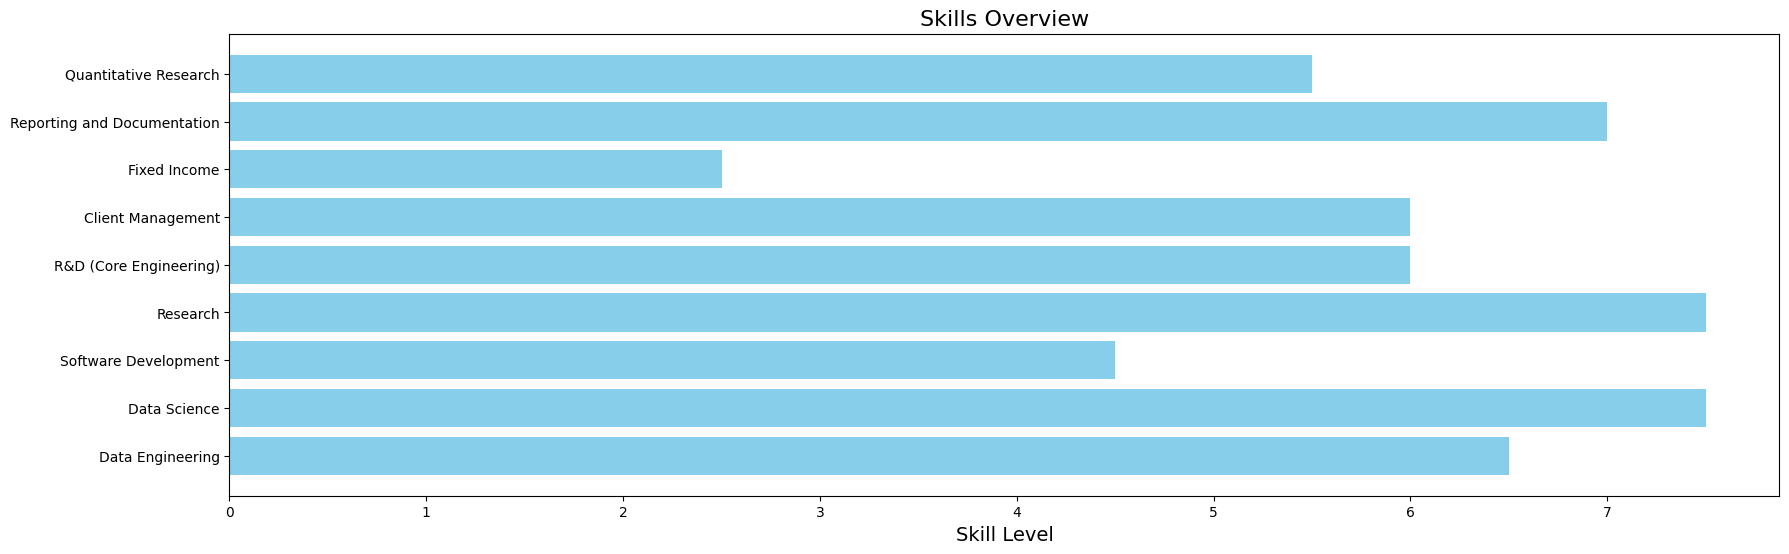

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Define the aspects and corresponding values
aspects = ['Data Engineering', 'Data Science', 'Software Development',
           'Research', 'R&D (Core Engineering)', 
           'Client Management', 'Fixed Income' , 'Reporting and Documentation', 'Quantitative Research']

values = [6.5, 7.5, 4.5, 7.5, 6.0, 6.0, 2.5 , 7.0, 5.5]

# Create a bar graph
plt.figure(figsize=(20, 6))
plt.barh(aspects, values, color='skyblue')
plt.xlabel('Skill Level', fontsize=14)
plt.title('Skills Overview', fontsize=16)

# Display the plot
plt.savefig('bar.pdf',dpi=200)
plt.show()
